(60000, 28, 28)


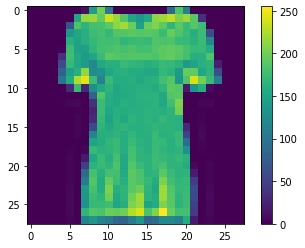

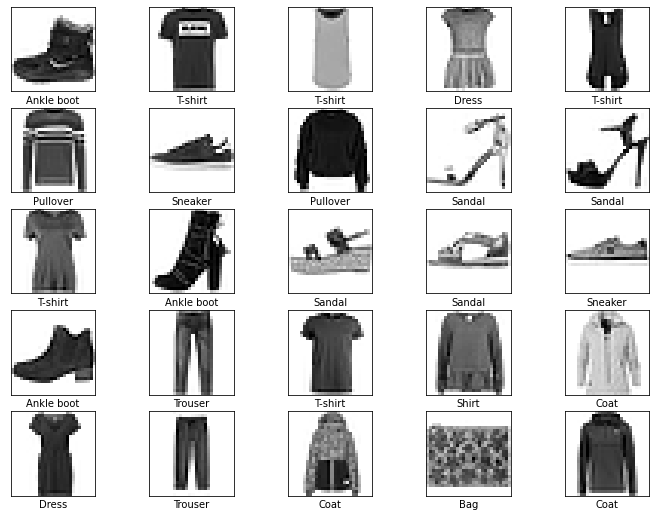

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1688/1688 [==============================] - 2s 823us/step - loss: 0.5234 - accuracy: 0.8189 - val_loss: 0.4155 - val_accuracy: 0.8493
Epoch 2/20
1688/1688 [==============================] - 1s 754us/step - loss: 0.3921 - accuracy: 0.8601 - val_loss: 0.3884 - val_accuracy: 0.8588
Epoch 3/20
1688/1688 [==============================] - 1s 730us/step - loss: 0.3580 - a

In [12]:
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape)
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(12, 9))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = Sequential([Flatten(input_shape=(28, 28)),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(train_images, train_labels, epochs=20, validation_split=0.1)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n\ntest accuracy:", test_acc)

In [13]:
predictions = model.predict(test_images)
predictions[0]

array([1.7873394e-09, 1.1782270e-09, 1.3250288e-10, 4.1306789e-12,
       1.5247237e-10, 1.4101195e-05, 3.4646066e-09, 4.9323663e-03,
       3.2404116e-10, 9.9505359e-01], dtype=float32)

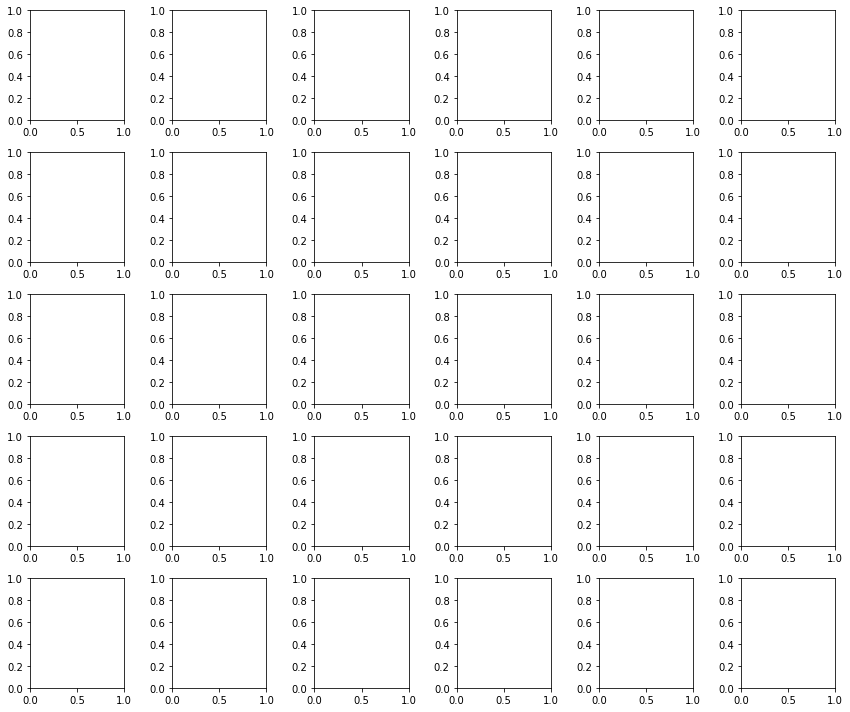

In [14]:
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
plt.tight_layout()
plt.show()

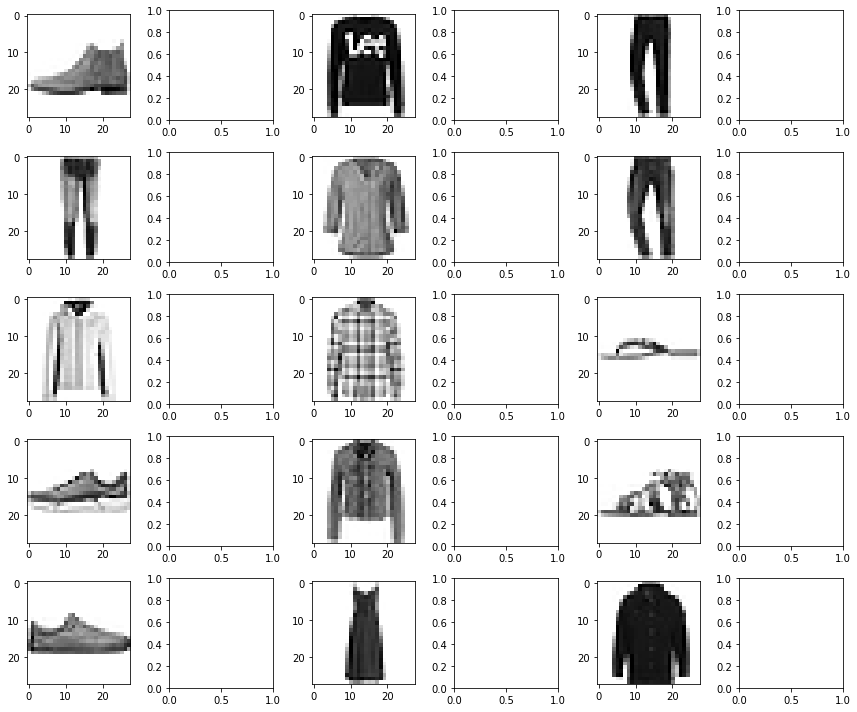

In [16]:
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
def plot_image(i,predictions_array, true_label, img):
    image = img[i]
    plt.imshow(image, cmap=plt.cm.binary)

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
plt.tight_layout()
plt.show()

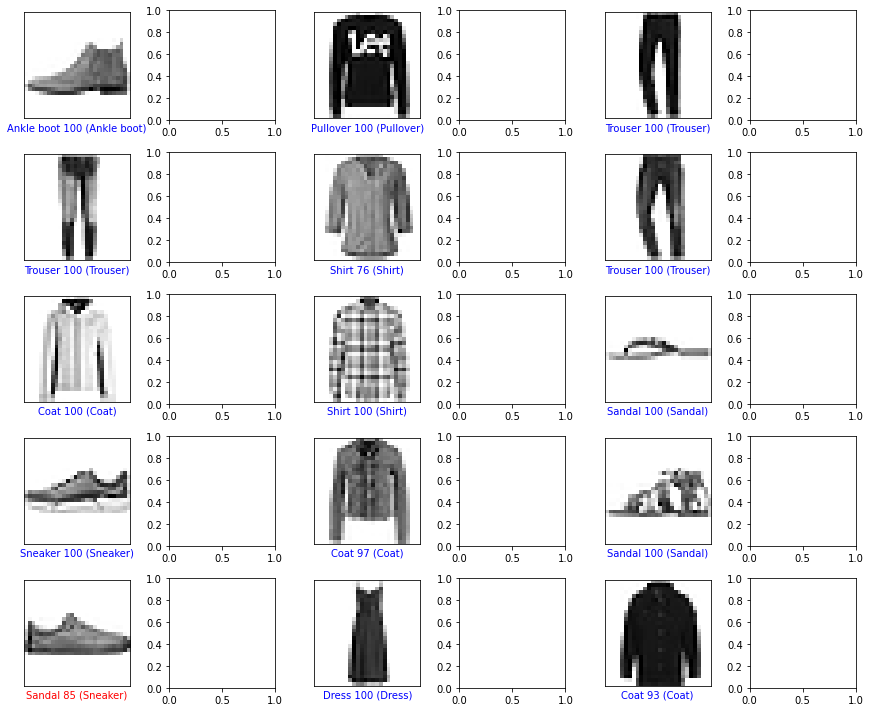

In [18]:
import numpy as np
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
def plot_image(i,predictions_array, true_label, img):
    image = img[i]
    current_true_label = true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == current_true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f} ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[current_true_label]),
              color=color)

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
plt.tight_layout()
plt.show()

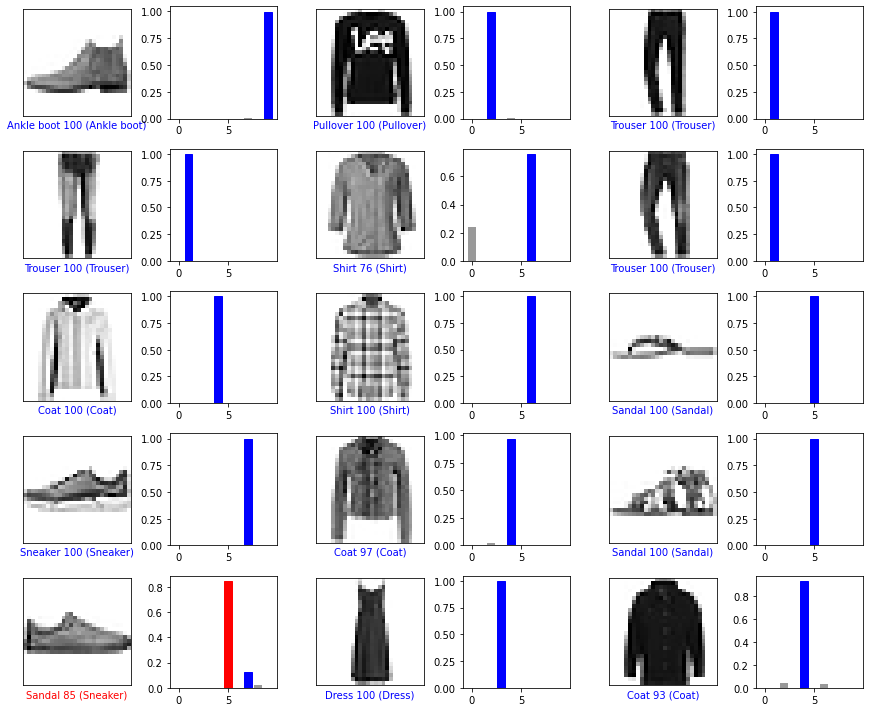

In [19]:
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
def plot_image(i,predictions_array, true_label, img):
    image = img[i]
    current_true_label = true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == current_true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f} ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[current_true_label]),
              color=color)
def plot_value_array(i, predictions_array, true_label):
    current_true_label = true_label[i]
    thisPlot = plt.bar(range(10), predictions_array, color='#999999')
    predicted_label = np.argmax(predictions_array)
    thisPlot[predicted_label].set_color('red')
    thisPlot[current_true_label].set_color('blue')
    

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()